In [407]:
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

import aotools

In [408]:
N   = 1024
d   = 0.0010
f   = 0.14
wvl = 1550e-9

k = 2*np.pi/wvl


In [409]:
D = 0.10
delta = D/N
x,y = np.linspace(-D/2, D/2, N), np.linspace(-D/2, D/2, N)
X,Y = np.meshgrid(x,y)


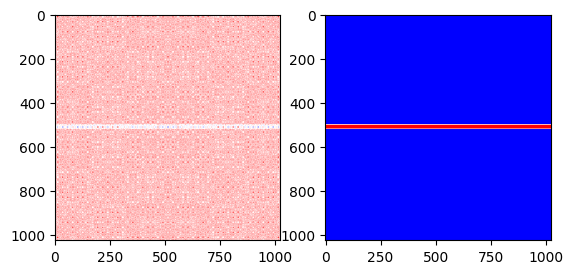

In [410]:
class WF(object):
    def __init__(self,N,wvl):
        self.N = N
        self.wvl = wvl
        self.U = np.ones((N,N),dtype="complex")
    def intensity(self):
        return np.abs(self.U)**2
    def phase(self):
        return np.angle(self.U)
    def __mul__(self,other):
        if type(other)=='WF':
            self.U = self.U * other.U
        else:
            self.U = self.U * other
        return self

    def show(self):
        fig,ax = plt.subplots(1,2)
        ax[0].imshow(self.phase())
        ax[1].imshow(self.intensity())
    
    

wf = WF(N,1550)
# A = aotools.circle((d/2)/delta,N)

A= np.zeros((N,N))
A[500:520] = 1

#$$ T(x,y) = \exp\left[-i\frac{k}{2f}(x^2+y^2)\right] $$

P = k/(2*f) * (X**2 + Y**2)

lens = A * np.exp(-1j*P)

wf = wf*lens
# wf = wf*A
wf.show()
    

In [411]:

wf2 = WF(N,wvl)
z = 5*f
wf2.U = aotools.opticalpropagation.angularSpectrum(wf.U,wvl,delta,delta/10,z)

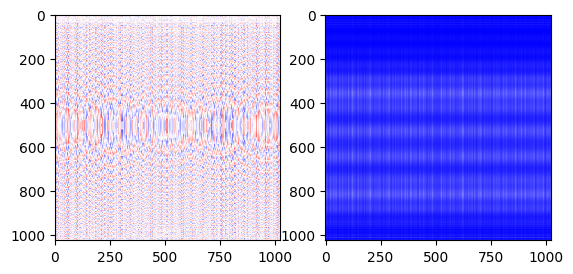

In [412]:

wf2.show()